# Homework 5: Exploring Ensemble Methods

In [1]:
import pandas as pd
import numpy as np
import json

In [18]:
from sklearn import ensemble

### 1. Data preprocessing

In [2]:
loans = pd.read_csv('lending-club-data.csv')

/Users/shute/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x == 0 else -1)
loans = loans.drop('bad_loans', axis = 1)

Select a subset of features

In [4]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

#### Skipping observations(rows) with missing values

In [5]:
loans = loans[[target] + features].dropna()

### 2. Splitting of train and test datasets (and balance the dataset)

one-hot encoding

In [8]:
loans = pd.get_dummies(loans)
features = loans.columns.tolist()
features.remove('safe_loans')

In [14]:
with open ('module-8-assignment-1-train-idx.json') as f:
    train_idx = json.load(f)
with open ('module-8-assignment-1-validation-idx.json') as f:
    validation_idx = json.load(f) 

In [15]:
train_data = loans.iloc[train_idx]
validation_data = loans.iloc[test_idx]

In [16]:
print train_data.shape
print validation_data.shape

(37219, 45)
(9284, 45)


### 3. Gradient boosted tree classifier

 set max_depth=6 and n_estimators=5

In [20]:
model_5 = ensemble.GradientBoostingClassifier(max_depth = 6, n_estimators = 5)

Sample data

In [19]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans.iloc[0:2]
sample_validation_data_safe = validation_safe_loans.iloc[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,1,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,1,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,-1,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41,-1,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
model_5.fit(train_data[features], train_data[target])

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5, presort='auto',
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [24]:
sample_predictions = model_5.predict(sample_validation_data[features])
sample_predictions

array([ 1,  1, -1,  1])

Percentage of correct predicitions:

In [25]:
sum(sample_predictions == sample_validation_data[target]) / float(len(sample_validation_data))

0.75

In [28]:
model_5.predict_proba(sample_validation_data[features])

array([[ 0.41642331,  0.58357669],
       [ 0.46949689,  0.53050311],
       [ 0.53807792,  0.46192208],
       [ 0.39591639,  0.60408361]])

In [36]:
model_5.classes_

array([-1,  1])

Evaluating the model on the validation data

In [41]:
x_validation = validation_data[features]
y_validation = validation_data[target]

In [42]:
model_5.score(x_validation, y_validation)

0.66146057733735464

In [43]:
predictions = model_5.predict(x_validation)

false positives:

In [44]:
sum(y_validation[y_validation != predictions] == -1)

1652

false negatives:

In [45]:
sum(y_validation[y_validation != predictions] == 1)

1491

### 4. Comparison with decision trees

In [51]:
cost = 20000 * 1491 + 10000 * 1652
cost

46340000

#### Most positive & negative loans.

In [61]:
predict_proba = [elm[1] for elm in model_5.predict_proba(validation_data[features])]

In [63]:
validation_data['predictions'] = predict_proba

/Users/shute/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


The 5 loans (in the validation_data) with the highest probability of being predicted as a safe loan.

In [81]:
validation_data.sort('predictions', ascending = False)['predictions'][0:5]

/Users/shute/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


8021      0.673059
105247    0.661468
16736     0.661468
96975     0.661468
4690      0.661468
Name: predictions, dtype: float64

The 5 loans (in the validation_data) with the lowest probability of being predicted as a safe loan.

In [83]:
validation_data.sort('predictions', ascending = True)[0:5]

/Users/shute/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,predictions
84508,-1,0.8,1,1,7.37,16.62070,0.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307334
58794,-1,0.8,0,2,8.66,17.62510,0.0,1.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307334
27502,-1,1.0,0,3,8.53,14.62800,0.0,1.0,0.0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312806
114781,-1,0.4,0,3,21.90,7.18760,1.0,0.0,4.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315973
84921,-1,0.8,0,9,8.54,7.48113,0.0,1.0,2.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.315973


#### Effects of adding more trees

In [70]:
model_10 = ensemble.GradientBoostingClassifier(max_depth = 6, n_estimators = 10)
model_50 = ensemble.GradientBoostingClassifier(max_depth = 6, n_estimators = 50)
model_100 = ensemble.GradientBoostingClassifier(max_depth = 6, n_estimators = 100)
model_200 = ensemble.GradientBoostingClassifier(max_depth = 6, n_estimators = 200)
model_500 = ensemble.GradientBoostingClassifier(max_depth = 6, n_estimators = 500)

Compare accuracy on entire validation set

In [85]:
model_10.fit(train_data[features], train_data[target])
model_50.fit(train_data[features], train_data[target])
model_100.fit(train_data[features], train_data[target])
model_200.fit(train_data[features], train_data[target])
model_500.fit(train_data[features], train_data[target])

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [86]:
print model_10.score(validation_data[features], validation_data[target])
print model_50.score(validation_data[features], validation_data[target])
print model_100.score(validation_data[features], validation_data[target])
print model_200.score(validation_data[features], validation_data[target])
print model_500.score(validation_data[features], validation_data[target])

0.666415338216
0.684403274451
0.690542869453
0.690542869453
0.688604049978


#### Plot the training and validation error vs. number of trees

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [76]:
train_err_10 = 1 - model_10.score(train_data[features], train_data[target])
train_err_50 = 1 - model_50.score(train_data[features], train_data[target])
train_err_100 = 1 - model_100.score(train_data[features], train_data[target])
train_err_200 = 1 - model_200.score(train_data[features], train_data[target])
train_err_500 = 1 - model_500.score(train_data[features], train_data[target])

In [77]:
training_errors = [train_err_10, train_err_50, train_err_100, train_err_200, train_err_500]

In [78]:
validation_err_10 = 1 - model_10.score(validation_data[features], validation_data[target])
validation_err_50 = 1 - model_50.score(validation_data[features], validation_data[target])
validation_err_100 = 1 - model_100.score(validation_data[features], validation_data[target])
validation_err_200 = 1 - model_200.score(validation_data[features], validation_data[target])
validation_err_500 = 1 - model_500.score(validation_data[features], validation_data[target])

In [79]:
validation_errors = [validation_err_10, validation_err_50, validation_err_100, validation_err_200, validation_err_500]

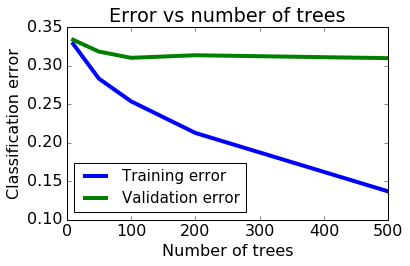

In [80]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')